## ALIGNN Tutorial

Install ALIGNN:
```
pip install alignn
```

In [32]:
from alignn.ff.ff import AlignnAtomwiseCalculator,default_path

model_path = default_path()
calc = AlignnAtomwiseCalculator(path=model_path)

model_path /media/colin/Shared/colin/git/materials-ml/env/lib/python3.10/site-packages/alignn/ff


In [28]:
from ase import Atom, Atoms
import numpy as np
import matplotlib.pyplot as plt

lattice_params = np.linspace(3.5, 3.8)

def make_fcc_copper(a=3.6):
    cu_atoms = Atoms([Atom('Cu', (0, 0, 0))],
                  cell=0.5 * a * \
                  np.array([[1.0, 1.0, 0.0],
                            [0.0, 1.0, 1.0],
                            [1.0, 0.0, 1.0]]),
                 pbc=True)
    
    return cu_atoms


In [29]:
fcc_energies = []
for a in lattice_params:
    atoms = make_fcc_copper(a)
    atoms.set_tags(np.ones(len(atoms)))
    atoms.calc = calc
    e = atoms.get_potential_energy()
    fcc_energies.append(e)

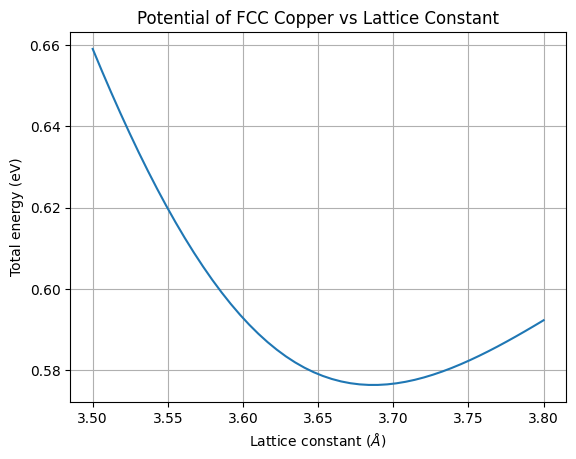

In [31]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.title('Potential of FCC Copper vs Lattice Constant')
plt.grid()
plt.plot(lattice_params, fcc_energies)
plt.xlabel('Lattice constant ($\AA$)')
plt.ylabel('Total energy (eV)')
plt.show()

In [16]:
from mp_api.client import MPRester
from pymatgen.io.ase import AseAtomsAdaptor as aaa

MPID = 'mp-20674' # Materials Project ID number for YBCO-123

with MPRester() as mpr:
    structure = mpr.get_structure_by_material_id(MPID)
    
raw_atoms = aaa.get_atoms(structure) # convert pymatgen to ase


Retrieving MaterialsDoc documents:   0%|          | 0/1 [00:00<?, ?it/s]

In [19]:
from ase.visualize import view

view(raw_atoms, viewer='x3d')

In [33]:
from alignn.ff.ff import AlignnAtomwiseCalculator, default_path
from ase.optimize import BFGS, BFGSLineSearch
from ase.io import read
import os

def alignn_ff_relax(raw_atoms, nsteps=5, 
                    filename='alignn_ff',
                    workdir='.'):
    atoms = raw_atoms.copy()
    atoms.set_tags(np.ones(len(atoms)))
    relax_calc = AlignnAtomwiseCalculator(path=default_path())
    atoms.calc = relax_calc
    init_energy = atoms.get_potential_energy()
    
    dyn = BFGS(atoms,
               trajectory=os.path.join(workdir,f'{filename}.traj'),
               restart=os.path.join(workdir, f'{filename}.pckl'))
    dyn.run(fmax=0.0065, steps=nsteps)
    final_energy = atoms.get_potential_energy()
    
    print(f'E_init = {init_energy}')
    print(f'E_final = {final_energy}')
    
    return atoms

relaxed_atoms = alignn_ff_relax(raw_atoms)

model_path /media/colin/Shared/colin/git/materials-ml/env/lib/python3.10/site-packages/alignn/ff
      Step     Time          Energy         fmax
BFGS:    0 14:30:29      -50.884412        0.0114
BFGS:    1 14:30:30      -50.220586        0.0127


KeyboardInterrupt: 